<a href="https://colab.research.google.com/github/ValentinBarco/Aprendizaje-de-maquina/blob/master/Valor_de_propiedades_en_boston.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Precio de las casas en boston  

In [1]:
import pandas as pd
Datos = pd.read_csv("https://raw.githubusercontent.com/emmanueliarussi/DataScienceCapstone/master/3_MidtermProjects/ProjectBHP/data/housing_data.csv")
Datos

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,NaN,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [2]:
import numpy as np
from sklearn import datasets, linear_model
import matplotlib.pyplot as plt




#Visualizacion de los Datos

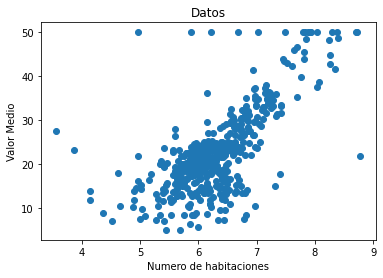

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()


In [3]:
Datos = pd.DataFrame(Datos);
X = Datos['RM'] #Cantidad de habitaciones
y = Datos['MEDV'] #Valor medio de la propiedad
plt.scatter(X,y)
plt.title('Datos')
plt.xlabel('Numero de habitaciones')
plt.ylabel('Valor Medio')
plt.show()
X = X[~(np.isnan(X))] 
y = y[~(np.isnan(y))] 
X = X[:, np.newaxis]

y = np.array(y)



En este caso utilizamos la cantidad media de habitaciones, ya que es un atributo que muchas personas se fijan a la hora de comprar una casa y ademas es un factor que influye mucho en el precio de la propiedad ya que al tener mas habitaciones conlleva a que la propiedad sea mas grande y por ende sea mas cara.

#Regresion lineal simple

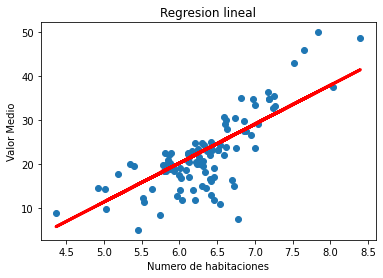

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

lr =  linear_model.LinearRegression()

lr.fit(X_train, y_train)

Y_pred = lr.predict(X_test)

plt.scatter(X_test,y_test)
plt.plot(X_test, Y_pred,color='red', linewidth= 3)
plt.title('Regresion lineal')
plt.xlabel('Numero de habitaciones')
plt.ylabel('Valor Medio')
plt.show()
 
 

#Datos de la regresion lineal

La pendiente es:  [8.86981731]
El termino independiente es:  -33.00708303887511
La precision del modelo es:   0.46230850968884285


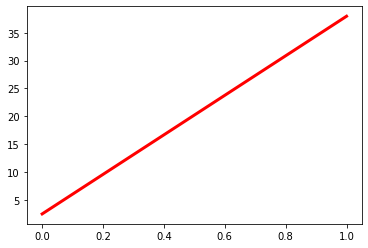

In [5]:
Coeficiente = lr.coef_
Valor_independiente = lr.intercept_
x1 = [4,8]
print('La pendiente es: ', Coeficiente)
print('El termino independiente es: ', Valor_independiente)

Ec = Coeficiente*x1 + Valor_independiente

plt.plot(Ec,color='red', linewidth= 3)

#Precision del modelo
print('La precision del modelo es:  ', lr.score(X_train, y_train))


Podemos apreciar que la precision del modelo es de un 52 % lo cual se puede tomar como aceptable para este trabajo ya que acienta en mas de la mitad de las ocaciones 

#Regresion lineal multiple

Se procedio a realizar un tipo de regrecion un poco mas completa teniendo en cuenta otro factor importante que influye en el valor de la propiedad

In [6]:
from mpl_toolkits.mplot3d import Axes3D

X_multiple = Datos[['RM','TAX']] # Tenemos en cuenta Cantidad media de habitaciones y tasa de impuesto a la propiedad de valor total por $ 10,000.
y_multiple = Datos['MEDV'] #Valor medio de la propiedad

X_multiple = X_multiple[~(np.isnan(X_multiple))] 
y_multiple = y_multiple[~(np.isnan(y_multiple))] 
X_multiple = np.array(X_multiple)

y_multiple = np.array(y_multiple)



En este caso se tuvo tambien en cuenta la tasa de impuesto a la propiedad, ya que al pagar mas impuestos se puede suponer que la propiedad se encuentra en una mejor hubicacion o esta situada en un lote el cual es relativamente mas grande que otros.




In [7]:
XY_train, XY_test, z_train, z_test = train_test_split(X_multiple,y_multiple, test_size=0.2)

lr_multiple =  linear_model.LinearRegression()

lr_multiple.fit(XY_train, z_train)

z_pred = lr_multiple.predict(XY_test)

#Datos de la regresion lineal multiple

In [8]:
Coeficiente_multiple = lr_multiple.coef_
Valor_independiente_multiple = lr_multiple.intercept_
print('La pendiente es: ', Coeficiente_multiple)
print('El termino independiente es: ', Valor_independiente_multiple)
print('La precision del modelo es:  ', lr_multiple.score(XY_train, z_train))


La pendiente es:  [ 7.95025139 -0.01523117]
El termino independiente es:  -21.07539143649851
La precision del modelo es:   0.5478544918695908


Podemos notar que utilizando varios atributos influyentes en el precio podemos mejorar la precision del modelo.